# A6: Integrating Differential Equations

In [1]:
using Plots
using LaTeXStrings
using Polynomials
using PrettyTables

In this assignment, you will apply knowledge that you have gained from the last few weeks to solve initial value problems numerically. These problems are found throughout science and engineering and have a number of important applications. In general, these equations cannot be solved exactly so, in practice, one implements various numerical schemes to obtain an approximate solution. However, it's a good idea to start with a problem where we do have access to the analytical solution so that we can analyse the erorrs in the approximation and get a feel for what is going on! 

Consider the following differential equation (initial value problem): for a fixed function $f$ and *initial condition* $u_0 \in \mathbb R$, find $u : [0,\infty) \to \mathbb R$ such that 

\begin{align}
    u'(t) &= f\big(t, u(t) \big) \tag{1}\\
    u(0) &= u_0.  \nonumber
\end{align}

We suppose that there exists $T>0$ and a unique continuously differentiable solution $u:[0,T] \to \mathbb R$ to this equation. This is guaranteed if $f$ is continuous and Lipschitz in its second argument (this is Picard's theorem and beyond the scope of this course).

We divide the interval $[0,T]$ into the *mesh points* $t_j = j h$ for $j=0,\dots,n$ where $h = \frac{T}{n}$ is the *step size*. In the following, we will approximate the solution $u$ at mesh points $t_j$. That is, for each $j$, we seek $u_j \approx u(t_j)$. 

1. Use the Fundamental Theorem of Calculus, to show that

\begin{align}
    u(t_{j+1}) - u(t_j) = \int_{t_j}^{t_{j+1}} f\big(s, u(s) \big) \mathrm{d}s. \tag{2}
\end{align}

<div class='alert alert-block alert-success'><b>Answer.</b> 

Note that $u(t) = u(0) + \int_0^t u'(s) \mathrm{d}s$ and so 

\begin{align*}
    u(t_{j+1}) - u(t_j) 
    %
    &= \int^{t_{j+1}}_{t_j} u'(s) \mathrm{d}{s} 
    %
    = \int^{t_{j+1}}_{t_j} f\big(s, u(s)\big) \mathrm{d}{s}. 
    %
\end{align*}

Here, we have used the fact that $u$ solves the initial value problem.

</div> 

2. Use the Rectangular rule on $[t_j, t_{j+1}]$ to derive *Euler's method*:

\begin{align}
    u_{j+1} = u_j + h f( t_j, u_j ), \qquad j = 0,\dots, n-1 \tag{3}
\end{align}

Sometimes this method is known as the *Explicit* Euler method because $u_{j+1}$ is given explicitly as a function of $u_j$. 

<div class='alert alert-block alert-success'><b>Answer.</b> 

The rectangular rule is $\int_a^b f \approx (b-a) f(a)$ and so we could approximate

\begin{align*}
    u(t_{j+1}) = u(t_j) + \int^{t_{j+1}}_{t_j} f\big(s, u(s)\big) \mathrm{d}{s}
\end{align*}

by 

\begin{align*}
    u_{j+1} &= u_j + ( t_{j+1} - t_j ) f( t_j , u_j ) \\
    %
    &= u_j + h f( t_j , u_j ).
\end{align*}

</div> 

3. Verify that the following initial value problem

\begin{align}
    u'(t) &= - u(t)^2 \cos t \tag{4}\\
    u(0) &= u_0 \nonumber
\end{align}

has a solution $u(t) = \frac{u_0}{ 1 + u_0 \sin t }$. For which initial conditions $u_0$ does the solution $u$ exist for all time $t\geq0$? For which initial conditions does the solution blow up in finite time?

<div class='alert alert-block alert-success'><b>Answer.</b> 

Notice that 

\begin{align*}
    u'(t) = -\frac{u_0}{(1 + u_0 \sin t)^2} \big( u_0 \cos t \big) = - u(t)^2 \cos t
\end{align*}

and $u(0) = \frac{u_0}{1 + u_0 \sin(0)} = u_0$.

When $|u_0| < 1$, we find that $u$ exists for all time $t\geq 0$. However, when $|u_0| \geq 1$, there exists $T$ for which $1 + u_0 \sin T = 0$ and so the solution blows up at $t = T$.

</div> 


Here, we define ``u_exact`` to be the solution of $(4)$. In the following, we will try and approximate this function by solving $(4)$ numerically.

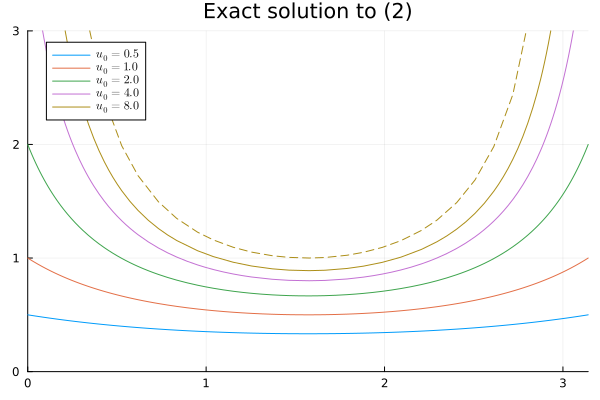

In [2]:
u_exact( t, u0=1. ) =  u0/( 1 + u0 * sin(t) ) 
plot( t-> u_exact(t, 0.5), xlims=(0, π), ylims=(0,3), 
    title="Exact solution to (2)", label=L"u_0 = 0.5" )
plot!( t-> u_exact(t, 1.0), label=L"u_0 = 1.0" )
plot!( t-> u_exact(t, 2.0), label=L"u_0 = 2.0" )
plot!( t-> u_exact(t, 4.0), label=L"u_0 = 4.0" )
plot!( t-> u_exact(t, 8.0), label=L"u_0 = 8.0" )
plot!( t-> 1/sin(t), linestyle=:dash, primary=false )

4. Fix $u_0 = 1$ and solve $(4)$ numerically using Euler's method. Some of the code has been provided for you:

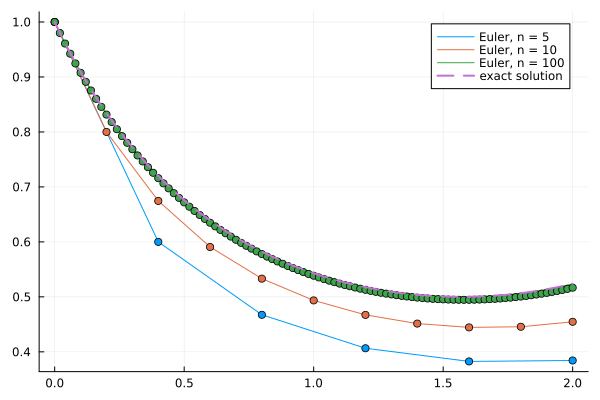

In [3]:
function Euler( u0, g, T, n )
    h = T/n;
    t = 0:h:T
    u = zeros(n+1)
    u[1] = u0
    for j = 1:n
        u[j+1] = u[j] + h * g( t[j], u[j] )
    end

    return u
end 

u0, T = 1., 2.
g(t, u) = - u^2 * cos(t)

plot( u_exact, 0, T, primary=false)

for n ∈ [5, 10, 100]
    u = Euler( u0, g, T, n )
    plot!( 0:(T/n):T, u, label = "Euler, n = $n" )
    scatter!( 0:(T/n):T, u, primary = false )
end 

plot!( u_exact, 0, T, lw=2, linestyle=:dash, label = "exact solution")

5. Plot the errors $e_n := \max_{j = 0,\dots,n} \big| u(t_j) - u_j \big|$ as a function of $n$. What is the rate of convergence?

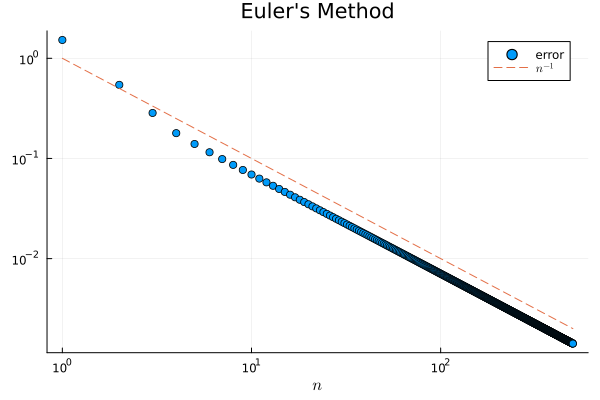

In [4]:
N = 500
errs = zeros(N)
for n ∈ 1:N
    u = Euler( u0, g, T, n )
    u_exact_grid = @. u_exact( 0:(T/n):T )
    errs[n] = maximum( @. abs( u - u_exact_grid ) )
end

scatter( errs, xaxis=:log, yaxis=:log, xlabel=L"n", label="error", lw=3, title="Euler's Method" )
plot!( (1:N).^(-1), label=L"n^{-1}", linestyle=:dash )
    

<div class='alert alert-block alert-success'><b>Answer.</b> 

The rate of convergence is $O(n^{-1})$. We use a log-log scale here so that we can see the errors as a straight line.
</div> 

Another approximation uses the Trapezoid rule on $[t_j, t_{j+1}]$: 

\begin{align}
    u_{j+1} = u_j + \frac{h}{2} \Big[ f\big( t_j, u_j \big) + f\big( t_{j+1}, u_{j+1} \big) \Big] \tag{3}
\end{align}

This is an implicit method because $u_{j+1}$ is given as a function of $u_{j+1}$ (i.e. we only have an implicit equation for $u_{j+1}$). Therefore, if we are to implement this equation, we need to be able to solve the fixed point problem $(3)$ for $u_{j+1}$.

6. Consider again the example $(4)$. Show that $(5)$ is equivalent to solving $\Phi( u_{j+1} ) = 0$ where

\begin{align}
    \Phi( v ) := \tfrac{h}2 \cos( t_{j+1} )  v^2 + v + \big( \tfrac{h}{2} \cos( t_j ) u_j - 1\big) u_j  \tag{6}
\end{align}

<div class='alert alert-block alert-success'><b>Answer.</b> 

Equation $(5)$ (when $f = -u^2 \cos t$), we have

\begin{align*}
    u_{j+1} = u_j - \frac{h}{2} \Big[ (u_j)^2 \cos t_j + (u_{j+1})^2 \cos t_{j+1}  \Big]
\end{align*}

Therefore, we have 

\begin{align*}
    u_{j+1} + \frac{h}{2} (u_j)^2 \cos t_j + \frac{h}{2}  (u_{j+1})^2 \cos t_{j+1}  - u_j = 0
\end{align*}

which is equivalent to $\Phi( u_{j+1} ) = 0$

</div> 

7. Explain why, for all sufficiently small $h$, Newton's iteration applied to $\Phi$ starting at $v_1 := u_j + h (u_j)^2 \cos( t_j )$ converges quadratically to some $u_{j+1}$ satisfying $\Phi( u_{j+1} ) = 0$.

8. Complete the following code to solve this implicit method using Newton's method and hence approximate the solution to $(2)$.

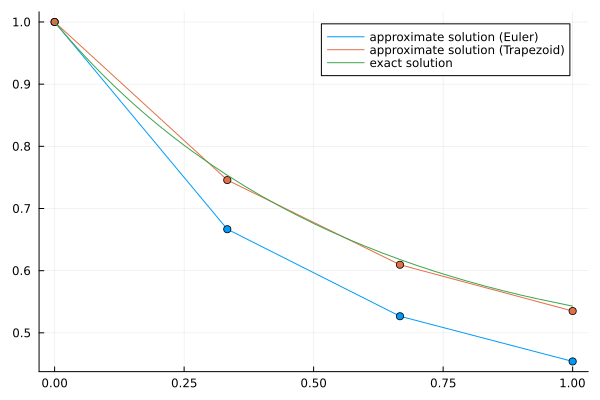

In [5]:
function Newton( f, f_prime, x1; N=100, tol=1e-10)
    for n in 2:N
        x1 = x1 - f(x1)/f_prime(x1) 
        r = abs(f(x1));
        if (r < tol)
            return x1
        end
    end
    @warn "max interations |f| = $r";
    return x1
end

function Trapezoid( u0, g, du_g, T, n )
    h = T/n;
    t = 0:h:T
    u = zeros(n+1)
    u[1] = u0
    for j = 1:n
        f = x -> u[j] + (h/2) * ( g( t[j], u[j] ) + g( t[j+1], x ) ) - x
        df = x -> (h/2) * du_g( t[j+1], x ) - 1
        u[j+1] = Newton( f, df, u[j] + h*g( t[j], u[j] ) )
    end

    return u
end 

u0, T, n = 1., 1., 3
g(t, u) = - u^2 * cos(t)
du_g(t, u) = -2*u * cos(t)

t = 0:(T/n):T
u = Euler( u0, g, T, n )
u2 = Trapezoid( u0, g, du_g, T, n )

plot( t, u, label = "approximate solution (Euler)" )
scatter!( t, u, primary = false )

plot!( t, u2, label = "approximate solution (Trapezoid)" )
scatter!( t, u2, primary = false )

plot!( u_exact, 0, 1, label = "exact solution" )

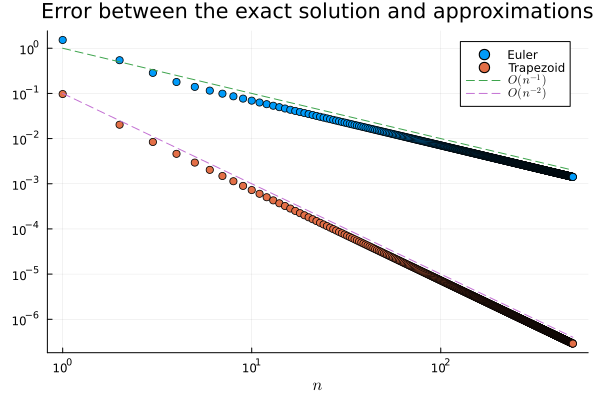

In [6]:
N = 500
errs2 = zeros(N)
for n ∈ 1:N
    u = Trapezoid( u0, g, du_g, T, n )
    u_exact_grid = @. u_exact( 0:(T/n):T )
    errs2[n] = maximum( @. abs( u - u_exact_grid ) )
end

scatter( errs, xaxis=:log, yaxis=:log, xlabel=L"n", label="Euler", lw=3, title="Error between the exact solution and approximations" )
scatter!( errs2, xaxis=:log, yaxis=:log, xlabel=L"n", label="Trapezoid", lw=3 )
plot!( (1:N).^(-1), label=L"O(n^{-1})", linestyle=:dash )
plot!( (1/10)*(1:N).^(-2), label=L"O(n^{-2})", linestyle=:dash )


<div class='alert alert-block alert-success'><b>Answer.</b> 

The rate of convergences is $O(n^{-2})$.

</div> 

## Examples of initial value problems

Recall that, we are looking at the IVP

\begin{align*}
    u'(t) &= f\big(t, u(t) \big), \quad t \in [0,T] \\
    u(0) &= u_0.
\end{align*}


::: {.callout-note icon=false collapse="false"}

## Example: Bacteria Growth, Compound Interest, ....

$N$ satisfies 

\begin{align*}
    N'(t) &= \mu N(t), \qquad N(0) = N_0.
\end{align*}

The change in the quantity $N$ at time $t$ is proportional to the quantity itself.

The solution is $N(t) = N_0 e^{\mu t}$ and so if $\mu > 0$ the population increases exponentially. If $\mu < 0$ then the population decays exponentially.

:::

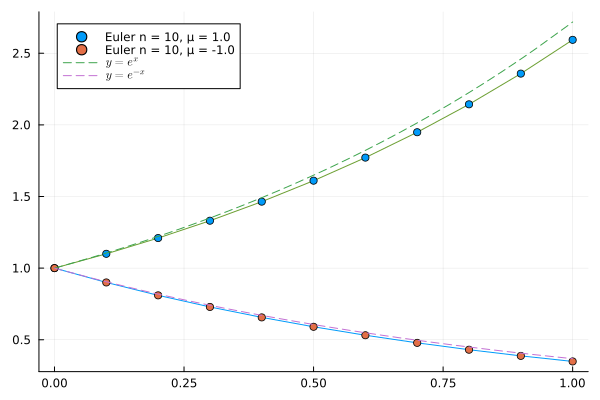

In [7]:
# Euler
μ = 1.
T, n = 1., 10
N = Euler( 1., (t,N)->μ*N, T, n )

plot( 0:(T/n):T, N, primary=false )
scatter!( 0:(T/n):T, N, label="Euler n = $n, μ = $μ" )

μ = -1.
N = Euler( 1., (t,N)->μ*N, T, n )

plot!( 0:(T/n):T, N, primary=false )
scatter!( 0:(T/n):T, N, label="Euler n = $n, μ = $μ" )

plot!( exp, label=L"y = e^{x}", linestyle=:dash )
plot!( t->exp(-t), label=L"y = e^{-x}", linestyle=:dash )



::: {.callout-note icon=false collapse="false"}

## Example: Logistic Equation (Verhulst, 1845)

Fix a *carrying capacity* $K$ and a *growth rate* $r$. A model for the population size at time $t$ is the IVP 

\begin{align}
    u'(t) = r u(t) \left( 1 - \frac{u(t)}{K} \right).
\end{align}

Here,

* $K$ represents the maximal size of the population, 
* $r$ determines how quickly the population can grow 

:::

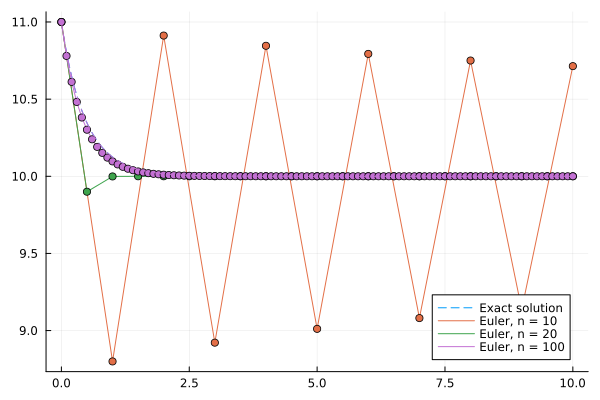

In [8]:
r, K = 2., 10.
f(t, P) = r * P * ( 1 - P/K ); 
P0, T = 11, 10;

P_exact(t) = P0 * K * exp( r * t )/ ( K-P0+P0*exp( r * t ) )
plot( P_exact, 0, T, linestyle=:dash, label="Exact solution" )

for n ∈ [10, 20, 100]
    P = Euler( P0, f, T, n )

    t = 0:(T/n):T
    plot!( t, P, label = "Euler, n = $n" )
    scatter!( t, P, primary = false )
end 

plot!( P_exact, 0, T, linestyle=:dash, primary=false )


::: {.callout-note icon=false collapse="false"}

## Example: Skydiver (Group II, Exercise 6.1.8, FNC)

Consider the following model for the velocity $v(t)$ of a skydiver 

\begin{align*}
    v'(t) &= -g + \frac{K(t)}{m} v^2, \\
    v(0) &= 0
\end{align*}

Here,

* $g = 9.81 \text{m/s}^2$ - acceleration due to gravity,
* $m$ - mass of the skydiver,
* $K(t)$ - time dependent parameter quantifying the effect of air resistance, (approximately) given by 

\begin{align}
    K(t) = \begin{cases}
        0.4875 & \text{if } t<13 \\
        29.16 &\text{if } t \geq 13
    \end{cases}
\end{align}

(i.e. the skydiver activates the parachute at time $t=13$). 

:::

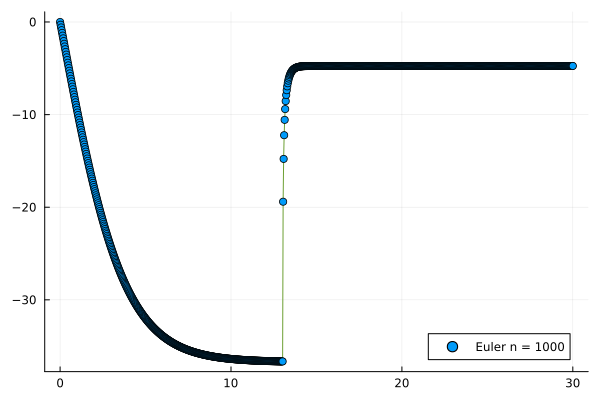

In [9]:
grav, m = 9.81, 67.
k(t) = (t < 13) ? 0.4875 : 29.16;
F(t, u) = -grav + k(t) * u^2 / m; 
v₀ = 0.0

# Euler

T, n = 30, 1000
v = Euler( v₀, F, T, n )

plot( 0:(T/n):T, v, primary=false )
scatter!( 0:(T/n):T, v, label="Euler n = $n" )

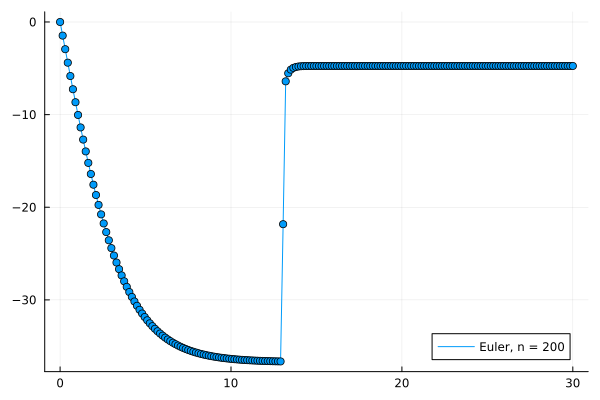

In [10]:
# Trapezoid

dF(t, v) = 2 * k(t) * v / m

plot( [], primary=false )

for n ∈ [200]
    v = Trapezoid( v₀, F, dF, T, n )

    t = 0:(T/n):T
    plot!( t, v, label = "Euler, n = $n" )
    scatter!( t, v, primary = false )
end 

plot!( [], primary=false )



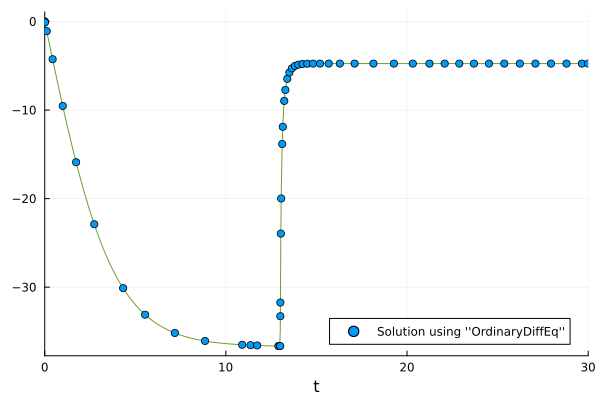

In [11]:
using OrdinaryDiffEq

F2(u, p, t) = -grav + k(t) * u^2 / m; 
ivp = ODEProblem( F2, v₀, (0.0,30.0) )
sol = solve(ivp, Tsit5());

plot( sol , primary = false)
scatter!( sol.t, sol.u, label="Solution using ''OrdinaryDiffEq''" )